# Experiments results of HPO algorithms

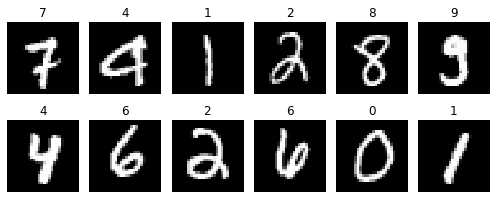

In [1]:
import os
import json
import pandas as pd
import numpy as np
import itertools
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
from Experiment import get_joulemeter_results, get_co2_results, get_cv_results, get_classification_report
from Experiment import t_test, save_results, read_json, merge_df

### Extract all results for each algorithm

In [2]:
algorithms = {
    'GS': 'Grid Search', 
    'RS': 'Random Search',
    'BO': 'Bayesian Optimization',
    'GA': 'Genetic Algorithm', 
    'PSO':'Particle Swarm Optimization'
}
joulemeter_results = { key: get_joulemeter_results(key) for key in algorithms.keys()}
co2_results = { key: get_co2_results(key) for key in algorithms.keys()}
cv_results = { key: get_cv_results(key) for key in algorithms.keys()}
classification_reports = { key: get_classification_report(key) for key in algorithms.keys()}

# 1) Grid Search

#### Joulemeter results

In [3]:
joulemeter_results["GS"]

,HPO,Base (KJ),CPU (KJ),Hardware (KJ),Application (KJ),Total Energy (KJ),Execution Time (s),Average Total Energy (J/s)
Sim1,GS,49.184,45.285,94.147,36.898,131.045,3278.942,39.966
Sim2,GS,47.922,43.893,91.501,36.484,127.985,3194.818,40.060
Sim3,GS,47.355,41.288,88.331,36.299,124.630,3157.022,39.477
Sim4,GS,47.673,42.681,90.041,36.359,126.400,3178.198,39.771
Sim5,GS,47.865,43.613,91.165,36.334,127.499,3190.970,39.956
Sim6,GS,50.524,53.546,103.926,37.678,141.604,3368.262,42.041
Sim7,GS,48.875,49.728,98.446,36.753,135.199,3258.307,41.494
Sim8,GS,47.098,42.315,89.126,35.979,125.104,3139.893,39.844
Sim9,GS,47.487,43.103,90.288,36.241,126.529,3165.819,39.967
Sim10,GS,47.402,42.705,89.800,36.299,126.098,3160.149,39.903


#### Carbon footprint results

In [4]:
#### Carbon footprint resultsco2_results["GS"]

In [5]:
joulemeter_results["GS"].describe().drop(["count"]).T

,mean,std,min,25%,50%,75%,max
Base (KJ),48.1385,1.071234,47.098,47.42325,47.7690,48.63675,50.524
CPU (KJ),44.8157,3.851557,41.288,42.68700,43.3580,44.93700,53.546
Hardware (KJ),92.6771,4.922529,88.331,89.86025,90.7265,93.48550,103.926
Application (KJ),36.5324,0.479191,35.979,36.29900,36.3465,36.68575,37.678
Total Energy (KJ),129.2093,5.373585,124.630,126.17350,127.0140,130.28000,141.604
Execution Time (s),3209.2380,71.406788,3139.893,3161.56650,3184.5840,3242.43475,3368.262
Average Total Energy (J/s),40.2479,0.826685,39.477,39.85875,39.9610,40.03675,42.041


In [6]:
classification_reports["GS"]

,0,1,2,3,4,5,6,7,8,9,accuracy,macro avg,weighted avg
precision,0.875,0.879,0.788,0.865,0.815,0.917,0.912,0.969,0.955,0.923,0.887,0.890,0.891
recall,1.000,0.967,0.897,0.889,0.880,0.815,0.912,0.838,0.913,0.774,0.887,0.888,0.887
f1-score,0.933,0.921,0.839,0.877,0.846,0.863,0.912,0.899,0.933,0.842,0.887,0.886,0.886
support,28.000,30.000,29.000,36.000,25.000,27.000,34.000,37.000,23.000,31.000,0.887,300.000,300.000


In [7]:
cv_results["GS"]

,Solver,Learning rate,Hidden layer size,Alpha,Activation function,Mean test score,Std test score,Solution Rank
Solution1,adam,constant,150,0.100,relu,0.881,0.024,1
Solution2,adam,adaptive,150,0.100,relu,0.881,0.024,1
Solution3,adam,adaptive,150,0.001,logistic,0.873,0.027,3
Solution4,adam,constant,150,0.001,logistic,0.873,0.027,3
Solution5,adam,adaptive,150,0.010,relu,0.871,0.028,5
Solution6,adam,constant,150,0.010,relu,0.871,0.028,5
Solution7,adam,constant,100,0.100,logistic,0.869,0.027,7
Solution8,adam,adaptive,100,0.100,logistic,0.869,0.027,7
Solution9,adam,adaptive,200,0.001,relu,0.869,0.034,9
Solution10,adam,constant,200,0.001,relu,0.869,0.034,9


# 2) Random Search

#### Simulation results

In [8]:
joulemeter_results["RS"]

,HPO,Base (KJ),CPU (KJ),Hardware (KJ),Application (KJ),Total Energy (KJ),Execution Time (s),Average Total Energy (J/s)
Sim1,RS,14.112,12.733,26.753,10.676,37.429,940.789,39.784
Sim2,RS,14.290,12.999,27.194,10.790,37.984,952.645,39.873
Sim3,RS,14.193,13.039,27.139,10.750,37.889,946.216,40.043
Sim4,RS,14.085,13.075,27.068,10.698,37.766,938.997,40.219
Sim5,RS,14.081,12.630,26.618,10.753,37.370,938.738,39.809
Sim6,RS,13.823,12.184,25.915,10.542,36.458,921.510,39.563
Sim7,RS,14.198,12.810,26.916,10.792,37.708,946.505,39.839
Sim8,RS,13.994,12.580,26.482,10.694,37.176,932.914,39.849
Sim9,RS,14.179,12.701,26.787,10.756,37.543,945.260,39.717
Sim10,RS,13.666,11.994,25.569,10.489,36.058,911.056,39.579


#### Carbon footprint results

In [9]:
co2_results["RS"]

,HPO,Total Energy (kWh),Emission (kgCH4/kWh)/year,Emission (kgN2O/kWh)/year,Emission (kgCO2/kWh)/year,Emission (kgCO2e/kWh)/year
Sim1,RS,0.010,0.073,0.125,19.141,19.338
Sim2,RS,0.011,0.074,0.127,19.425,19.625
Sim3,RS,0.011,0.074,0.126,19.376,19.576
Sim4,RS,0.010,0.074,0.126,19.313,19.512
Sim5,RS,0.010,0.073,0.125,19.111,19.308
Sim6,RS,0.010,0.071,0.122,18.644,18.837
Sim7,RS,0.010,0.073,0.126,19.283,19.482
Sim8,RS,0.010,0.072,0.124,19.011,19.208
Sim9,RS,0.010,0.073,0.125,19.199,19.397
Sim10,RS,0.010,0.070,0.120,18.440,18.630


In [10]:
classification_reports["RS"]

,0,1,2,3,4,5,6,7,8,9,accuracy,macro avg,weighted avg
precision,0.875,0.879,0.788,0.865,0.815,0.917,0.912,0.969,0.955,0.923,0.887,0.890,0.891
recall,1.000,0.967,0.897,0.889,0.880,0.815,0.912,0.838,0.913,0.774,0.887,0.888,0.887
f1-score,0.933,0.921,0.839,0.877,0.846,0.863,0.912,0.899,0.933,0.842,0.887,0.886,0.886
support,28.000,30.000,29.000,36.000,25.000,27.000,34.000,37.000,23.000,31.000,0.887,300.000,300.000


In [11]:
joulemeter_results["RS"].describe().drop(["count"]).T

,mean,std,min,25%,50%,75%,max
Base (KJ),14.0621,0.189526,13.666,14.01575,14.0985,14.18950,14.290
CPU (KJ),12.6745,0.355219,11.994,12.59250,12.7170,12.95175,13.075
Hardware (KJ),26.6441,0.532040,25.569,26.51600,26.7700,27.03000,27.194
Application (KJ),10.6940,0.102605,10.489,10.68050,10.7240,10.75525,10.792
Total Energy (KJ),37.3381,0.626398,36.058,37.22450,37.4860,37.75150,37.984
Execution Time (s),937.4630,12.636901,911.056,934.37000,939.8930,945.97700,952.645
Average Total Energy (J/s),39.8275,0.196789,39.563,39.73375,39.8240,39.86700,40.219


In [12]:
cv_results["RS"]

,Solver,Learning rate,Hidden layer size,Alpha,Activation function,Mean test score,Std test score,Solution Rank
Solution1,adam,adaptive,150,0.100,relu,0.881,0.024,1
Solution2,adam,constant,150,0.001,logistic,0.873,0.027,2
Solution3,adam,adaptive,150,0.010,relu,0.871,0.028,3
Solution4,adam,constant,100,0.100,logistic,0.869,0.027,4
Solution5,adam,adaptive,25,0.100,relu,0.868,0.042,5
Solution6,adam,adaptive,100,0.100,relu,0.868,0.029,6
Solution7,adam,constant,25,0.010,relu,0.868,0.041,7
Solution8,adam,adaptive,50,0.100,logistic,0.867,0.026,8
Solution9,adam,constant,150,0.100,logistic,0.867,0.025,9
Solution10,adam,adaptive,100,0.001,logistic,0.866,0.028,10


# 3) Bayesian Optimization

#### Simulation results

In [13]:
joulemeter_results["BO"]

,HPO,Base (KJ),CPU (KJ),Hardware (KJ),Application (KJ),Total Energy (KJ),Execution Time (s),Average Total Energy (J/s)
Sim1,BO,9.511,8.608,18.056,7.238,25.294,634.087,39.890
Sim2,BO,9.463,8.581,17.981,7.203,25.184,630.863,39.920
Sim3,BO,9.691,8.869,18.496,7.338,25.833,646.065,39.986
Sim4,BO,9.621,9.132,18.690,7.268,25.958,641.369,40.474
Sim5,BO,9.958,9.105,18.997,7.510,26.508,663.886,39.928
Sim6,BO,5.184,4.414,9.564,3.884,13.448,345.611,38.910
Sim7,BO,5.176,4.382,9.523,3.869,13.392,345.054,38.812
Sim8,BO,5.108,4.349,9.424,3.841,13.265,340.560,38.951
Sim9,BO,5.195,4.420,9.580,3.898,13.478,346.308,38.920
Sim10,BO,5.348,4.689,10.002,3.939,13.941,356.566,39.099


#### Carbon footprint results

In [14]:
co2_results["BO"]

,HPO,Total Energy (kWh),Emission (kgCH4/kWh)/year,Emission (kgN2O/kWh)/year,Emission (kgCO2/kWh)/year,Emission (kgCO2e/kWh)/year
Sim1,BO,0.007,0.049,0.084,12.935,13.069
Sim2,BO,0.007,0.049,0.084,12.879,13.012
Sim3,BO,0.007,0.050,0.086,13.211,13.347
Sim4,BO,0.007,0.051,0.087,13.275,13.412
Sim5,BO,0.007,0.052,0.088,13.556,13.696
Sim6,BO,0.004,0.026,0.045,6.877,6.948
Sim7,BO,0.004,0.026,0.045,6.849,6.919
Sim8,BO,0.004,0.026,0.044,6.784,6.854
Sim9,BO,0.004,0.026,0.045,6.893,6.964
Sim10,BO,0.004,0.027,0.046,7.129,7.203


In [15]:
joulemeter_results["BO"].describe().drop(["count"]).T

,mean,std,min,25%,50%,75%,max
Base (KJ),7.4255,2.347895,5.108,5.18675,7.4055,9.59350,9.958
CPU (KJ),6.6549,2.331669,4.349,4.41550,6.6350,8.80375,9.132
Hardware (KJ),14.0313,4.662518,9.424,9.56800,13.9915,18.38600,18.997
Application (KJ),5.5988,1.807221,3.841,3.88750,5.5710,7.26050,7.510
Total Energy (KJ),19.6301,6.468817,13.265,13.45550,19.5625,25.69825,26.508
Execution Time (s),495.0369,156.523625,340.560,345.78525,493.7145,639.54850,663.886
Average Total Energy (J/s),39.4890,0.606941,38.812,38.92775,39.4945,39.92600,40.474


In [16]:
classification_reports["BO"]

,0,1,2,3,4,5,6,7,8,9,accuracy,macro avg,weighted avg
precision,0.875,0.879,0.788,0.865,0.815,0.917,0.912,0.969,0.955,0.923,0.887,0.890,0.891
recall,1.000,0.967,0.897,0.889,0.880,0.815,0.912,0.838,0.913,0.774,0.887,0.888,0.887
f1-score,0.933,0.921,0.839,0.877,0.846,0.863,0.912,0.899,0.933,0.842,0.887,0.886,0.886
support,28.000,30.000,29.000,36.000,25.000,27.000,34.000,37.000,23.000,31.000,0.887,300.000,300.000


In [17]:
cv_results["BO"]

,Solver,Learning rate,Hidden layer size,Alpha,Activation function,Mean test score,Std test score,Solution Rank
Solution1,adam,constant,150,0.100,relu,0.881,0.024,1
Solution2,adam,adaptive,150,0.010,relu,0.871,0.028,2
Solution3,adam,adaptive,25,0.100,relu,0.868,0.042,3
Solution4,adam,constant,100,0.100,relu,0.868,0.029,4
Solution5,adam,constant,150,0.001,relu,0.868,0.027,5
Solution6,adam,constant,25,0.001,relu,0.868,0.041,6
Solution7,adam,adaptive,100,0.010,relu,0.867,0.036,7
Solution8,adam,adaptive,200,0.010,relu,0.864,0.037,8
Solution9,adam,adaptive,150,0.010,tanh,0.860,0.035,9
Solution10,adam,adaptive,100,0.100,tanh,0.859,0.030,10


# 4) Genetic Algorithm

#### Simulation results

In [18]:
joulemeter_results["GA"]

,HPO,Base (KJ),CPU (KJ),Hardware (KJ),Application (KJ),Total Energy (KJ),Execution Time (s),Average Total Energy (J/s)
Sim1,GA,12.024,10.233,22.179,8.247,30.425,801.571,37.957
Sim2,GA,11.814,10.417,22.153,8.711,30.864,787.574,39.189
Sim3,GA,11.622,10.126,21.671,8.707,30.377,774.799,39.207
Sim4,GA,11.888,9.760,21.570,8.132,29.702,792.537,37.477
Sim5,GA,11.913,9.729,21.563,8.116,29.679,794.192,37.371
Sim6,GA,11.663,10.570,22.186,8.757,30.943,777.510,39.798
Sim7,GA,11.448,10.062,21.435,8.782,30.217,763.182,39.594
Sim8,GA,11.138,9.941,21.010,8.568,29.578,742.564,39.832
Sim9,GA,13.084,11.750,24.750,10.114,34.864,872.256,39.970
Sim10,GA,9.425,8.445,17.812,7.190,25.002,628.324,39.792


#### Carbon footprint results

In [19]:
co2_results["GA"]

,HPO,Total Energy (kWh),Emission (kgCH4/kWh)/year,Emission (kgN2O/kWh)/year,Emission (kgCO2/kWh)/year,Emission (kgCO2e/kWh)/year
Sim1,GA,0.008,0.059,0.101,15.559,15.720
Sim2,GA,0.009,0.060,0.103,15.783,15.946
Sim3,GA,0.008,0.059,0.101,15.535,15.695
Sim4,GA,0.008,0.058,0.099,15.189,15.346
Sim5,GA,0.008,0.058,0.099,15.178,15.334
Sim6,GA,0.009,0.060,0.103,15.824,15.987
Sim7,GA,0.008,0.059,0.101,15.453,15.612
Sim8,GA,0.008,0.058,0.099,15.126,15.282
Sim9,GA,0.010,0.068,0.116,17.829,18.013
Sim10,GA,0.007,0.049,0.083,12.786,12.918


In [20]:
joulemeter_results["GA"].describe().drop(["count"]).T

,mean,std,min,25%,50%,75%,max
Base (KJ),11.6019,0.917747,9.425,11.49150,11.7385,11.90675,13.084
CPU (KJ),10.1033,0.821999,8.445,9.80525,10.0940,10.37100,11.750
Hardware (KJ),21.6329,1.687460,17.812,21.46700,21.6205,22.17250,24.750
Application (KJ),8.5324,0.737492,7.190,8.16075,8.6375,8.74550,10.114
Total Energy (KJ),30.1651,2.374434,25.002,29.68475,30.2970,30.75425,34.864
Execution Time (s),773.4509,61.179775,628.324,766.08625,782.5420,793.77825,872.256
Average Total Energy (J/s),39.0187,1.021226,37.371,38.26500,39.4005,39.79650,39.970


In [21]:
classification_reports["GA"]

,0,1,2,3,4,5,6,7,8,9,accuracy,macro avg,weighted avg
precision,0.903,0.879,0.806,0.865,0.821,0.885,0.941,0.903,0.952,0.857,0.88,0.881,0.882
recall,1.000,0.967,0.862,0.889,0.920,0.852,0.941,0.757,0.870,0.774,0.88,0.883,0.880
f1-score,0.949,0.921,0.833,0.877,0.868,0.868,0.941,0.824,0.909,0.814,0.88,0.880,0.879
support,28.000,30.000,29.000,36.000,25.000,27.000,34.000,37.000,23.000,31.000,0.88,300.000,300.000


In [22]:
cv_results["GA"]

,Solver,Learning rate,Hidden layer size,Alpha,Activation function,Mean test score,Std test score,Solution Rank
Solution1,adam,adaptive,200,0.001,relu,0.869,0.034,1
Solution2,adam,adaptive,25,0.100,relu,0.868,0.042,2
Solution3,adam,adaptive,100,0.100,relu,0.868,0.029,3
Solution4,adam,adaptive,25,0.010,relu,0.868,0.041,4
Solution5,adam,constant,200,0.100,relu,0.867,0.031,5
Solution6,adam,constant,100,0.010,relu,0.867,0.036,6
Solution7,adam,adaptive,100,0.001,relu,0.867,0.036,6
Solution8,adam,constant,25,0.100,tanh,0.866,0.045,8
Solution9,adam,adaptive,100,0.001,logistic,0.866,0.028,9
Solution10,adam,constant,200,0.001,logistic,0.866,0.026,10


# 5) Particle Swarm Optimization

#### Simulation results

In [23]:
joulemeter_results["PSO"]

,HPO,Base (KJ),CPU (KJ),Hardware (KJ),Application (KJ),Total Energy (KJ),Execution Time (s),Average Total Energy (J/s)
Sim1,PSO,12.795,11.645,24.356,9.436,33.793,852.993,39.617
Sim2,PSO,13.052,11.706,24.671,9.276,33.947,870.102,39.015
Sim3,PSO,12.900,11.893,24.708,9.517,34.224,859.969,39.797
Sim4,PSO,12.751,11.785,24.453,9.529,33.982,850.066,39.975
Sim5,PSO,12.946,11.975,24.838,9.542,34.380,863.097,39.833
Sim6,PSO,16.830,15.705,32.432,12.678,45.110,1122.002,40.205
Sim7,PSO,17.732,16.436,34.057,13.326,47.384,1182.108,40.084
Sim8,PSO,17.636,16.287,33.810,13.334,47.144,1175.702,40.099
Sim9,PSO,15.814,14.372,30.083,11.948,42.031,1054.265,39.868
Sim10,PSO,12.786,11.583,24.286,9.538,33.824,852.424,39.679


In [24]:
co2_results["PSO"]

,HPO,Total Energy (kWh),Emission (kgCH4/kWh)/year,Emission (kgN2O/kWh)/year,Emission (kgCO2/kWh)/year,Emission (kgCO2e/kWh)/year
Sim1,PSO,0.009,0.066,0.113,17.281,17.460
Sim2,PSO,0.009,0.066,0.113,17.360,17.540
Sim3,PSO,0.010,0.067,0.114,17.502,17.683
Sim4,PSO,0.009,0.066,0.113,17.378,17.557
Sim5,PSO,0.010,0.067,0.115,17.581,17.763
Sim6,PSO,0.013,0.088,0.150,23.069,23.307
Sim7,PSO,0.013,0.092,0.158,24.232,24.482
Sim8,PSO,0.013,0.092,0.157,24.109,24.358
Sim9,PSO,0.012,0.082,0.140,21.494,21.716
Sim10,PSO,0.009,0.066,0.113,17.297,17.476


In [25]:
joulemeter_results["PSO"].describe().drop(["count"]).T

,mean,std,min,25%,50%,75%,max
Base (KJ),14.5242,2.196093,12.751,12.82125,12.9990,16.57600,17.732
CPU (KJ),13.3387,2.106428,11.583,11.72575,11.9340,15.37175,16.436
Hardware (KJ),27.7694,4.287768,24.286,24.50750,24.7730,31.84475,34.057
Application (KJ),10.8124,1.772158,9.276,9.52000,9.5400,12.49550,13.334
Total Energy (KJ),38.5819,6.056757,33.793,33.95575,34.3020,44.34025,47.384
Execution Time (s),968.2728,146.398271,850.066,854.73700,866.5995,1105.06775,1182.108
Average Total Energy (J/s),39.8172,0.338596,39.015,39.70850,39.8505,40.05675,40.205


In [26]:
classification_reports["PSO"]

,0,1,2,3,4,5,6,7,8,9,accuracy,macro avg,weighted avg
precision,0.903,0.879,0.812,0.886,0.852,0.852,0.939,0.938,0.913,0.889,0.887,0.886,0.889
recall,1.000,0.967,0.897,0.861,0.920,0.852,0.912,0.811,0.913,0.774,0.887,0.891,0.887
f1-score,0.949,0.921,0.852,0.873,0.885,0.852,0.925,0.870,0.913,0.828,0.887,0.887,0.886
support,28.000,30.000,29.000,36.000,25.000,27.000,34.000,37.000,23.000,31.000,0.887,300.000,300.000


#### Carbon footprint results

In [27]:
cv_results["PSO"]

,Solver,Learning rate,Hidden layer size,Alpha,Activation function,Mean test score,Std test score,Solution Rank
Solution1,adam,adaptive,150,0.010,relu,0.871,0.028,1
Solution2,adam,adaptive,200,0.001,relu,0.869,0.034,2
Solution3,adam,constant,200,0.001,relu,0.869,0.034,2
Solution4,adam,adaptive,150,0.001,relu,0.868,0.027,4
Solution5,adam,adaptive,200,0.100,relu,0.867,0.031,5
Solution6,adam,constant,100,0.001,relu,0.867,0.036,6
Solution7,adam,adaptive,200,0.001,logistic,0.866,0.026,7
Solution8,adam,adaptive,200,0.010,relu,0.864,0.037,8
Solution9,adam,constant,200,0.010,relu,0.864,0.037,8
Solution10,adam,adaptive,50,0.100,relu,0.864,0.030,10


# Global Results

In [28]:
global_energy_results = pd.concat([df for key, df in joulemeter_results.items()], axis=0)
save_results(path="./results/", file_name="global_energy_results.csv", df=global_energy_results, index=False)
global_energy_results

,HPO,Base (KJ),CPU (KJ),Hardware (KJ),Application (KJ),Total Energy (KJ),Execution Time (s),Average Total Energy (J/s)
Sim1,GS,49.184,45.285,94.147,36.898,131.045,3278.942,39.966
Sim2,GS,47.922,43.893,91.501,36.484,127.985,3194.818,40.060
Sim3,GS,47.355,41.288,88.331,36.299,124.630,3157.022,39.477
Sim4,GS,47.673,42.681,90.041,36.359,126.400,3178.198,39.771
Sim5,GS,47.865,43.613,91.165,36.334,127.499,3190.970,39.956
Sim6,GS,50.524,53.546,103.926,37.678,141.604,3368.262,42.041
Sim7,GS,48.875,49.728,98.446,36.753,135.199,3258.307,41.494
Sim8,GS,47.098,42.315,89.126,35.979,125.104,3139.893,39.844
Sim9,GS,47.487,43.103,90.288,36.241,126.529,3165.819,39.967
Sim10,GS,47.402,42.705,89.800,36.299,126.098,3160.149,39.903


In [29]:
global_energy_results.describe().T.drop(columns=["count"])

,mean,std,min,25%,50%,75%,max
Base (KJ),19.15044,14.936468,5.108,11.49150,13.0680,16.57600,50.524
CPU (KJ),17.51742,14.156806,4.349,9.80525,11.9340,15.37175,53.546
Hardware (KJ),36.55096,28.982142,9.424,21.46700,24.7940,31.84475,103.926
Application (KJ),14.43400,11.382085,3.841,8.16075,9.8280,12.49550,37.678
Total Energy (KJ),50.98490,40.350014,13.265,29.68475,34.6220,44.34025,141.604
Execution Time (s),1276.69232,995.767510,340.560,766.08625,871.1790,1105.06775,3368.262
Average Total Energy (J/s),39.68006,0.764004,37.371,39.56700,39.8325,39.96675,42.041


# Visualize global results

### Comparaison between algorithms in term of energy consumption used

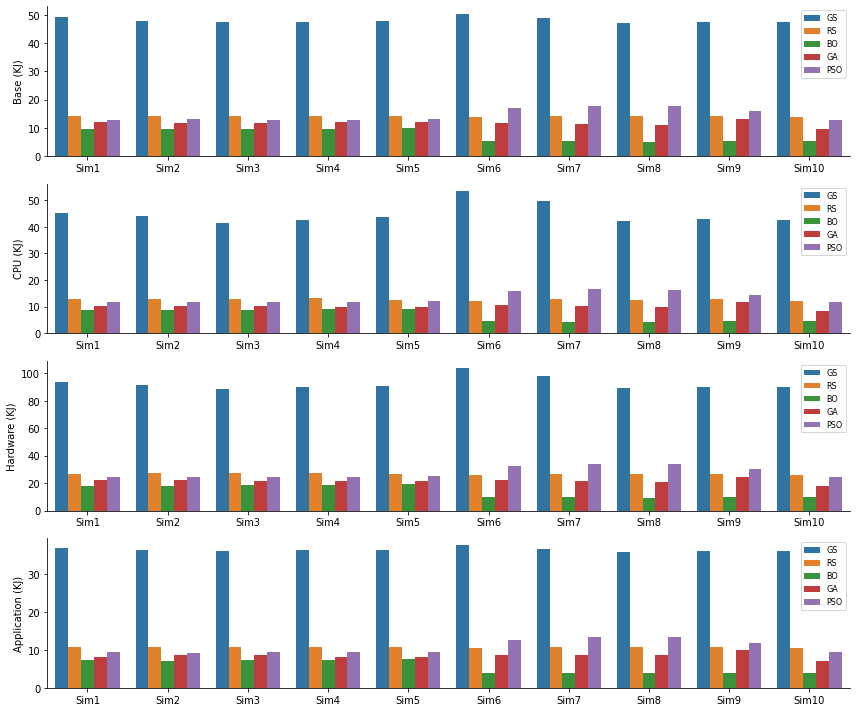

In [30]:
fig = plt.figure(figsize=(12,10))

plt.subplots_adjust(hspace=0.35)

x = global_energy_results.index
y1 = global_energy_results['Base (KJ)']
y2 = global_energy_results['CPU (KJ)']
y3 = global_energy_results['Hardware (KJ)']
y4 = global_energy_results['Application (KJ)']
hue = global_energy_results['HPO']

fig.add_subplot(411)
sns.barplot(x= x, y=y1 ,hue=hue)
plt.legend(fontsize=8, title_fontsize=14, title ='')
plt.xlabel("")

fig.add_subplot(412)
sns.barplot(x=x , y=y2 ,hue=hue)
plt.legend(fontsize=8, title_fontsize=14, title ='')
plt.xlabel("")

fig.add_subplot(413)
sns.barplot(x=x , y=y3 ,hue=hue)
plt.legend(fontsize=8, title_fontsize=14, title ='')
plt.xlabel("")

fig.add_subplot(414)
sns.barplot(x=x , y=y4 ,hue=hue)
plt.legend(fontsize=8, title_fontsize=14, title ='')
plt.xlabel("")

sns.despine()
plt.tight_layout() 

plt.savefig("./results/energy_consumption_simulations.png", dpi=300, bbox_inches='tight')

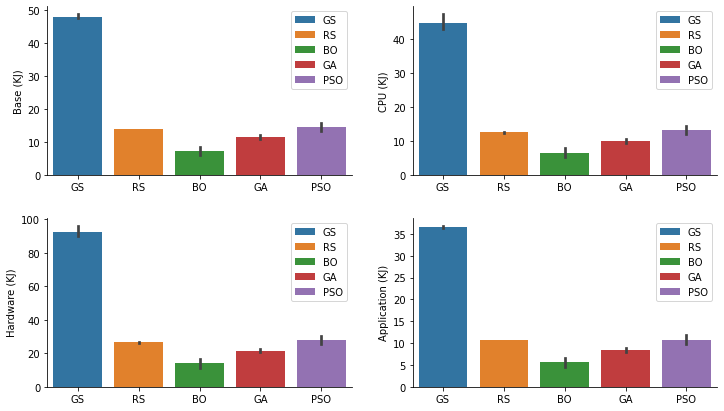

In [31]:
fig = plt.figure(figsize=(12,7))

data = global_energy_results
hue = 'HPO'
y1 = 'Base (KJ)'
y2 = 'CPU (KJ)'
y3 = 'Hardware (KJ)'
y4 = 'Application (KJ)'


plt.subplots_adjust(hspace=0.25)

fig.add_subplot(221)
sns.barplot(data=data, x=hue,y=y1 ,hue=hue, dodge=False)
plt.legend(fontsize=10, title_fontsize=14, title ='')
plt.xlabel("")

fig.add_subplot(222)
sns.barplot(data=data, x=hue,y=y2,hue=hue, dodge=False)
plt.legend(fontsize=10, title_fontsize=14, title ='')
plt.xlabel("")

fig.add_subplot(223)
sns.barplot(data=data, x=hue,y=y3,hue=hue, dodge=False)
plt.legend(fontsize=10, title_fontsize=14, title ='')
plt.xlabel("")


fig.add_subplot(224)
sns.barplot(data=data, x=hue,y=y4,hue=hue, dodge=False)
plt.legend(fontsize=10, title_fontsize=14, title ='')
plt.xlabel("")
sns.despine()
plt.savefig("./results/energy_consumption_average_simulations.png", dpi=300, bbox_inches='tight')

### Comparaison between algorithms in term of execution time, total energy consumption and average

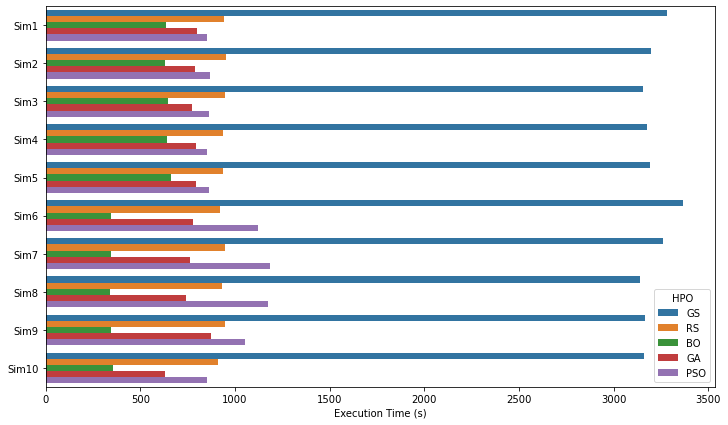

In [32]:
# Show groups with different colors using "hue"
plt.figure(figsize=(12,7))
sns.barplot(y=global_energy_results.index , x=global_energy_results['Execution Time (s)'] ,hue=global_energy_results['HPO'])
plt.savefig("./results/execution_time_simulations.png", dpi=300, bbox_inches='tight')
plt.show()

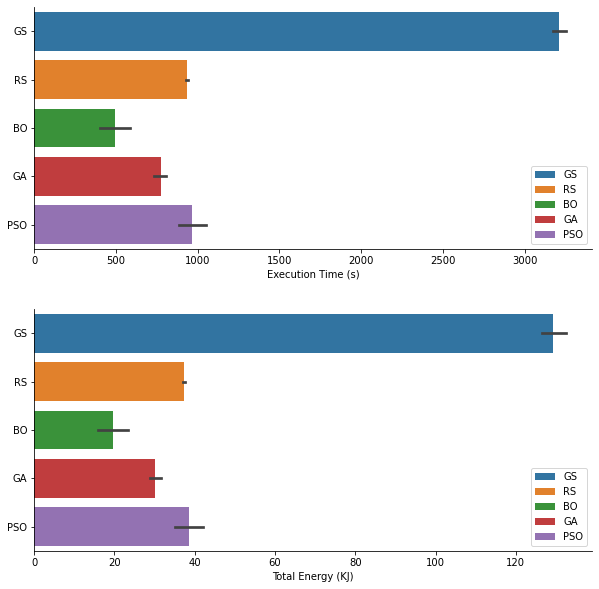

In [33]:
fig = plt.figure(figsize=(10,10))

data = global_energy_results
hue = 'HPO'
y1 = 'Execution Time (s)'
y2 = 'Total Energy (KJ)'


plt.subplots_adjust(hspace=0.25)

fig.add_subplot(211)
sns.barplot(data=data, y=hue, x=y1 ,hue=hue, dodge=False)
plt.legend(fontsize=10, title_fontsize=14, title ='')
plt.ylabel("")

fig.add_subplot(212)
sns.barplot(data=data, y=hue,x=y2,hue=hue, dodge=False)
plt.legend(fontsize=10, title_fontsize=14, title ='')
plt.ylabel("")

sns.despine()
plt.savefig("./results/total_exectime_energy.png", dpi=300, bbox_inches='tight')

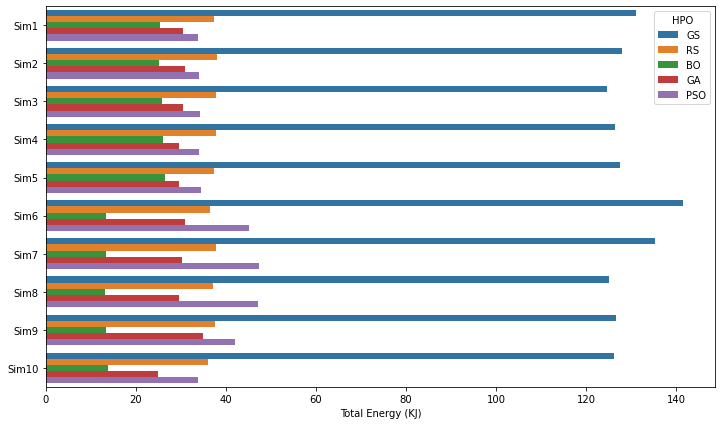

In [34]:
# Show groups with different colors using "hue"
plt.figure(figsize=(12,7))
sns.barplot(y=global_energy_results.index , x=global_energy_results['Total Energy (KJ)'] ,hue=global_energy_results['HPO'])
plt.savefig("./results/total_energy_simulations.png", dpi=300, bbox_inches='tight')
plt.show()

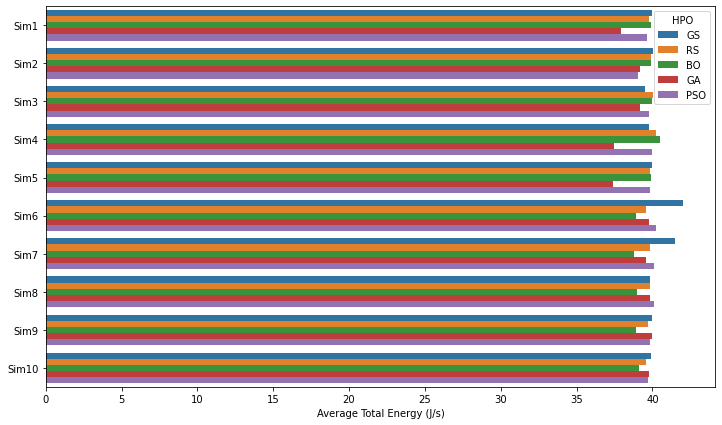

In [35]:
plt.figure(figsize=(12,7))

sns.barplot(y=global_energy_results.index , x=global_energy_results['Average Total Energy (J/s)'] ,hue=global_energy_results['HPO'])
plt.savefig("./results/constant_energy_rate.png", dpi=300, bbox_inches='tight')
plt.show()

In [36]:
global_co2_results = pd.concat([df for key, df in co2_results.items()], axis=0)
save_results(path="./results/", file_name="global_co2_results.csv", df=global_co2_results, index=True)
global_co2_results

,HPO,Total Energy (kWh),Emission (kgCH4/kWh)/year,Emission (kgN2O/kWh)/year,Emission (kgCO2/kWh)/year,Emission (kgCO2e/kWh)/year
Sim1,GS,0.036,0.255,0.437,67.015,67.707
Sim2,GS,0.036,0.249,0.427,65.450,66.126
Sim3,GS,0.035,0.243,0.415,63.734,64.393
Sim4,GS,0.035,0.246,0.421,64.640,65.307
Sim5,GS,0.035,0.248,0.425,65.202,65.875
Sim6,GS,0.039,0.276,0.472,72.415,73.163
Sim7,GS,0.038,0.263,0.451,69.140,69.853
Sim8,GS,0.035,0.244,0.417,63.977,64.638
Sim9,GS,0.035,0.246,0.422,64.706,65.374
Sim10,GS,0.035,0.245,0.420,64.485,65.151


# Carbon footprint barchart

In [37]:
global_co2_results

,HPO,Total Energy (kWh),Emission (kgCH4/kWh)/year,Emission (kgN2O/kWh)/year,Emission (kgCO2/kWh)/year,Emission (kgCO2e/kWh)/year
Sim1,GS,0.036,0.255,0.437,67.015,67.707
Sim2,GS,0.036,0.249,0.427,65.450,66.126
Sim3,GS,0.035,0.243,0.415,63.734,64.393
Sim4,GS,0.035,0.246,0.421,64.640,65.307
Sim5,GS,0.035,0.248,0.425,65.202,65.875
Sim6,GS,0.039,0.276,0.472,72.415,73.163
Sim7,GS,0.038,0.263,0.451,69.140,69.853
Sim8,GS,0.035,0.244,0.417,63.977,64.638
Sim9,GS,0.035,0.246,0.422,64.706,65.374
Sim10,GS,0.035,0.245,0.420,64.485,65.151


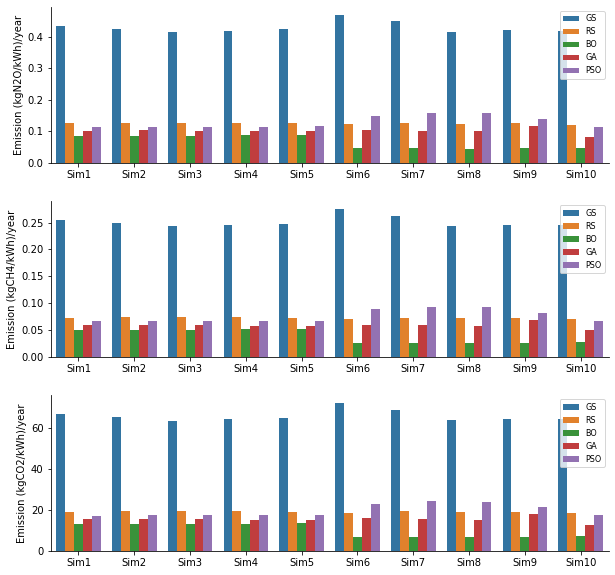

In [38]:
fig = plt.figure(figsize=(10,10))

plt.subplots_adjust(hspace=0.25)

x = global_co2_results.index

hue = global_co2_results['HPO']
y1 = global_co2_results['Emission (kgN2O/kWh)/year']
y2 = global_co2_results['Emission (kgCH4/kWh)/year']
y3 = global_co2_results['Emission (kgCO2/kWh)/year']

fig.add_subplot(311)
sns.barplot(x=x , y=y1 ,hue=hue)
plt.legend(fontsize=8, title_fontsize=14, title ='')
plt.xlabel("")

fig.add_subplot(312)
sns.barplot(x=x , y=y2 ,hue=hue)
plt.legend(fontsize=8, title_fontsize=14, title ='')
plt.xlabel("")

fig.add_subplot(313)
sns.barplot(x=x , y=y3 ,hue=hue)
plt.legend(fontsize=8, title_fontsize=14, title ='')
plt.xlabel("")


sns.despine()

plt.savefig("./results/co2_different_types_of_emissions_total.png", dpi=300, bbox_inches='tight')

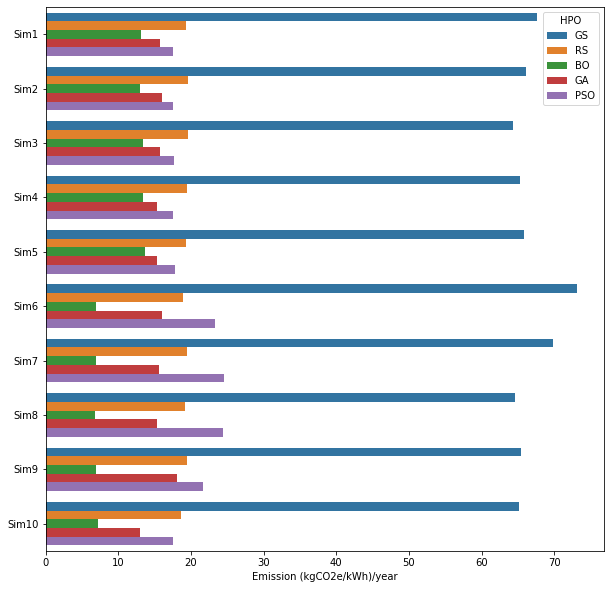

In [39]:
df = global_co2_results
hue = df['HPO']
x = df['Emission (kgCO2e/kWh)/year']
y = df.index

plt.figure(figsize=(10,10))
sns.barplot(y=y , x=x ,hue=hue)
plt.savefig("./results/co2_emissions_simulations.png", dpi=300, bbox_inches='tight')
plt.show()

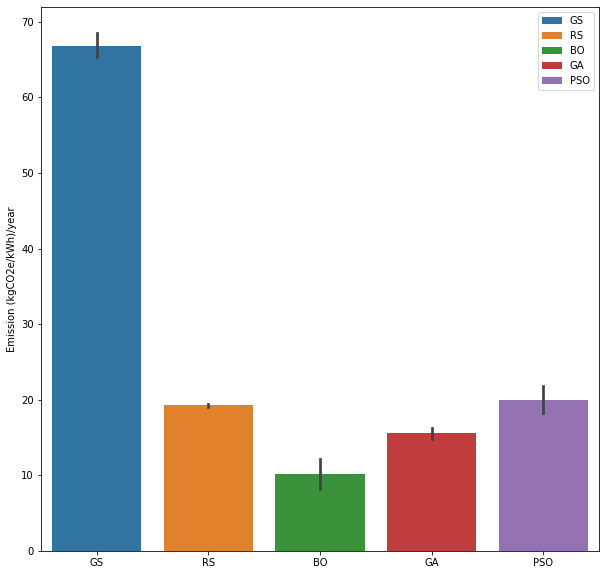

In [40]:
fig = plt.figure(figsize=(10,10))

data = global_co2_results
hue = 'HPO'
y = 'Emission (kgCO2e/kWh)/year'

sns.barplot(data=df, x=hue, y=y ,hue=hue, dodge=False)
plt.legend(fontsize=10, title_fontsize=14, title ='')
plt.xlabel("")

plt.savefig("./results/co2_emissions_total.png", dpi=300, bbox_inches='tight')

### Aggregated results of the 10 simulations

#### Energy consumption

In [41]:
agg_energy_results= pd.DataFrame({ key: df.drop(columns=["HPO"], errors="ignore").sum() for key, df in joulemeter_results.items()})
save_results(path="./results/", file_name="agg_energy_results.csv", df=agg_energy_results.round(3), index=True)
agg_energy_results

,GS,RS,BO,GA,PSO
Base (KJ),481.385,140.621,74.255,116.019,145.242
CPU (KJ),448.157,126.745,66.549,101.033,133.387
Hardware (KJ),926.771,266.441,140.313,216.329,277.694
Application (KJ),365.324,106.940,55.988,85.324,108.124
Total Energy (KJ),1292.093,373.381,196.301,301.651,385.819
Execution Time (s),32092.380,9374.630,4950.369,7734.509,9682.728
Average Total Energy (J/s),402.479,398.275,394.890,390.187,398.172


#### Carbon Footprint

In [42]:
agg_co2_results= pd.DataFrame({key: df.drop(columns=["HPO"], errors="ignore").sum() for key, df in co2_results.items()})
save_results(path="./results/", file_name="agg_co2_results.csv", df=agg_co2_results.round(3), index=True)
agg_co2_results

,GS,RS,BO,GA,PSO
Total Energy (kWh),0.359,0.102,0.055,0.083,0.107
Emission (kgCH4/kWh)/year,2.515,0.727,0.382,0.588,0.752
Emission (kgN2O/kWh)/year,4.307,1.246,0.654,1.005,1.286
Emission (kgCO2/kWh)/year,660.764,190.943,100.388,154.262,197.303
Emission (kgCO2e/kWh)/year,667.587,192.913,101.424,155.853,199.342


# Two sample t-test pariwise comparaison of means 

In [43]:
combinations = list(itertools.combinations(algorithms.keys(), 2)) # Get all possible combinations
data = { key: merge_df(joulemeter_results[key], co2_results[key])  for key in algorithms.keys()}              
t_test_results = { "{}_{}".format(algo_1, algo_2): t_test(data, algo_1, algo_2) for algo_1, algo_2 in combinations}

In [44]:
t_test_results['GS_RS']

,Mean (GS),Mean (RS),t-stat,p_value,Null Hypothesis
Execution Time (s),3209.238,937.463,99.067,9.996817e-16,Reject
Total Energy (KJ),129.209,37.338,53.701,2.528735e-21,Reject
Total Energy (kWh),0.036,0.010,53.849,2.407435e-21,Reject
Average Total Energy (J/s),40.248,39.828,1.564,1.351291e-01,Fail to Reject
Emission (kgCH4/kWh)/year,0.252,0.073,53.358,2.836227e-21,Reject
Emission (kgN2O/kWh)/year,0.431,0.125,53.353,7.846571e-13,Reject
Emission (kgCO2/kWh)/year,66.076,19.094,53.699,2.530614e-21,Reject
Emission (kgCO2e/kWh)/year,66.759,19.291,53.702,2.528015e-21,Reject


In [45]:
t_test_results['GS_BO']

,Mean (GS),Mean (BO),t-stat,p_value,Null Hypothesis
Execution Time (s),3209.238,495.037,49.889,7.526271e-16,Reject
Total Energy (KJ),129.209,19.630,41.205,2.866805e-19,Reject
Total Energy (kWh),0.036,0.006,44.822,6.392968e-20,Reject
Average Total Energy (J/s),40.248,39.489,2.340,3.100391e-02,Fail to Reject
Emission (kgCH4/kWh)/year,0.252,0.038,40.948,3.205751e-19,Reject
Emission (kgN2O/kWh)/year,0.431,0.065,41.133,2.958375e-19,Reject
Emission (kgCO2/kWh)/year,66.076,10.039,41.205,2.867647e-19,Reject
Emission (kgCO2e/kWh)/year,66.759,10.142,41.205,2.867101e-19,Reject


In [46]:
t_test_results['GS_GA']

,Mean (GS),Mean (GA),t-stat,p_value,Null Hypothesis
Execution Time (s),3209.238,773.451,81.916,1.303707e-24,Reject
Total Energy (KJ),129.209,30.165,53.313,2.879041e-21,Reject
Total Energy (kWh),0.036,0.008,52.367,3.965959e-21,Reject
Average Total Energy (J/s),40.248,39.019,2.958,8.411268e-03,Reject
Emission (kgCH4/kWh)/year,0.252,0.059,53.216,2.974517e-21,Reject
Emission (kgN2O/kWh)/year,0.431,0.100,53.036,3.160327e-21,Reject
Emission (kgCO2/kWh)/year,66.076,15.426,53.312,2.880340e-21,Reject
Emission (kgCO2e/kWh)/year,66.759,15.585,53.314,2.877957e-21,Reject


In [47]:
t_test_results['GS_PSO']

,Mean (GS),Mean (PSO),t-stat,p_value,Null Hypothesis
Execution Time (s),3209.238,968.273,43.507,1.087901e-19,Reject
Total Energy (KJ),129.209,38.582,35.395,4.283681e-18,Reject
Total Energy (kWh),0.036,0.011,34.153,8.076681e-18,Reject
Average Total Energy (J/s),40.248,39.817,1.525,1.447342e-01,Fail to Reject
Emission (kgCH4/kWh)/year,0.252,0.075,35.322,4.443325e-18,Reject
Emission (kgN2O/kWh)/year,0.431,0.129,35.405,4.261409e-18,Reject
Emission (kgCO2/kWh)/year,66.076,19.730,35.393,4.287232e-18,Reject
Emission (kgCO2e/kWh)/year,66.759,19.934,35.395,4.282940e-18,Reject


In [48]:
t_test_results['RS_BO']

,Mean (RS),Mean (BO),t-stat,p_value,Null Hypothesis
Execution Time (s),937.463,495.037,8.909,0.000009,Reject
Total Energy (KJ),37.338,19.630,8.616,0.000011,Reject
Total Energy (kWh),0.010,0.006,9.083,0.000003,Reject
Average Total Energy (J/s),39.828,39.489,1.678,0.121892,Fail to Reject
Emission (kgCH4/kWh)/year,0.073,0.038,8.555,0.000011,Reject
Emission (kgN2O/kWh)/year,0.125,0.065,8.649,0.000010,Reject
Emission (kgCO2/kWh)/year,19.094,10.039,8.616,0.000011,Reject
Emission (kgCO2e/kWh)/year,19.291,10.142,8.616,0.000011,Reject


In [49]:
t_test_results['RS_GA']

,Mean (RS),Mean (GA),t-stat,p_value,Null Hypothesis
Execution Time (s),937.463,773.451,8.302,1.439424e-07,Reject
Total Energy (KJ),37.338,30.165,9.237,2.985893e-08,Reject
Total Energy (kWh),0.010,0.008,6.496,4.149438e-06,Reject
Average Total Energy (J/s),39.828,39.019,2.459,3.448409e-02,Fail to Reject
Emission (kgCH4/kWh)/year,0.073,0.059,9.285,2.761988e-08,Reject
Emission (kgN2O/kWh)/year,0.125,0.100,9.281,2.781513e-08,Reject
Emission (kgCO2/kWh)/year,19.094,15.426,9.237,2.983673e-08,Reject
Emission (kgCO2e/kWh)/year,19.291,15.585,9.238,2.981732e-08,Reject


In [50]:
t_test_results['RS_PSO']

,Mean (RS),Mean (PSO),t-stat,p_value,Null Hypothesis
Execution Time (s),937.463,968.273,-0.663,0.523682,Fail to Reject
Total Energy (KJ),37.338,38.582,-0.646,0.534102,Fail to Reject
Total Energy (kWh),0.010,0.011,-0.842,0.419299,Fail to Reject
Average Total Energy (J/s),39.828,39.817,0.083,0.934635,Fail to Reject
Emission (kgCH4/kWh)/year,0.073,0.075,-0.667,0.520986,Fail to Reject
Emission (kgN2O/kWh)/year,0.125,0.129,-0.626,0.546325,Fail to Reject
Emission (kgCO2/kWh)/year,19.094,19.730,-0.646,0.534165,Fail to Reject
Emission (kgCO2e/kWh)/year,19.291,19.934,-0.646,0.533929,Fail to Reject


In [51]:
t_test_results['BO_GA']

,Mean (BO),Mean (GA),t-stat,p_value,Null Hypothesis
Execution Time (s),495.037,773.451,-5.239,0.000227,Reject
Total Energy (KJ),19.630,30.165,-4.835,0.000475,Reject
Total Energy (kWh),0.006,0.008,-4.967,0.000228,Reject
Average Total Energy (J/s),39.489,39.019,1.252,0.226632,Fail to Reject
Emission (kgCH4/kWh)/year,0.038,0.059,-4.836,0.000488,Reject
Emission (kgN2O/kWh)/year,0.065,0.100,-4.835,0.000473,Reject
Emission (kgCO2/kWh)/year,10.039,15.426,-4.835,0.000475,Reject
Emission (kgCO2e/kWh)/year,10.142,15.585,-4.834,0.000475,Reject


In [52]:
t_test_results['BO_PSO']

,Mean (BO),Mean (PSO),t-stat,p_value,Null Hypothesis
Execution Time (s),495.037,968.273,-6.983,0.000002,Reject
Total Energy (KJ),19.630,38.582,-6.763,0.000002,Reject
Total Energy (kWh),0.006,0.011,-6.802,0.000002,Reject
Average Total Energy (J/s),39.489,39.817,-1.493,0.157378,Fail to Reject
Emission (kgCH4/kWh)/year,0.038,0.075,-6.761,0.000002,Reject
Emission (kgN2O/kWh)/year,0.065,0.129,-6.786,0.000002,Reject
Emission (kgCO2/kWh)/year,10.039,19.730,-6.763,0.000002,Reject
Emission (kgCO2e/kWh)/year,10.142,19.934,-6.763,0.000002,Reject


In [53]:
t_test_results['GA_PSO']

,Mean (GA),Mean (PSO),t-stat,p_value,Null Hypothesis
Execution Time (s),773.451,968.273,-3.883,0.001090,Reject
Total Energy (KJ),30.165,38.582,-4.091,0.000685,Reject
Total Energy (kWh),0.008,0.011,-3.784,0.002428,Reject
Average Total Energy (J/s),39.019,39.817,-2.347,0.038782,Fail to Reject
Emission (kgCH4/kWh)/year,0.059,0.075,-4.110,0.000658,Reject
Emission (kgN2O/kWh)/year,0.100,0.129,-4.115,0.000650,Reject
Emission (kgCO2/kWh)/year,15.426,19.730,-4.091,0.000686,Reject
Emission (kgCO2e/kWh)/year,15.585,19.934,-4.092,0.000685,Reject
